Imports libraries

In [35]:
import chardet
import numpy as np
import scipy as sp
from scipy import stats
import scipy.constants as constants
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
dataFrame = pd.read_excel('difeletron.ods', engine='odf')

dataFrame

# print(dataFrame['Voltagem (kV)'])



,Voltagem (kV),Raio interno (cm),Raio externo (cm),Comprimento de onda,Comprimento de onda (Picometro)
0,2.0,4.7,7.1,#DIV/0!,#DIV/0!
1,2.5,3.7,6.2,#DIV/0!,#DIV/0!
2,3.0,3.2,5.1,#DIV/0!,#DIV/0!
3,3.5,2.9,4.8,#DIV/0!,#DIV/0!
4,4.0,2.6,4.4,#DIV/0!,#DIV/0!
5,4.5,2.3,4.2,#DIV/0!,#DIV/0!
6,5.0,2.3,3.8,#DIV/0!,#DIV/0!
7,5.5,2.3,3.7,#DIV/0!,#DIV/0!
8,6.0,2.2,3.4,#DIV/0!,#DIV/0!
9,6.5,2.0,3.3,#DIV/0!,#DIV/0!


In [37]:
# d1 = [3.1, 2.8, 2.5, 2.3, 2.1, 2.0, 1.9, 1.7, 1.7, 1.5, 1.5, 1.7, 1.6, 1.5, 1.5, 1.4]
# d2 = [5.5, 4.9, 4.3, 4.1, 3.9, 3.8, 3.6, 3.4, 3.1, 2.9, 2.9, 3.0, 2.9, 2.8, 2.7, 2.7]

# d1 = [3.1, 3.4, 2.8, 2.9, 2.5, 2.9, 2.3, 2.6, 2.1, 2.4, 2.0, 2.2, 1.9, 2.1, 1.7, 2.0, 1.7, 2.0, 1.5, 1.8, 1.5, 1.9, 1.7, 1.7, 1.6, 1.7, 1.5, 1.7, 1.5, 1.5, 1.4]
# d2 = [5.5, 5.7, 4.9, 4.9, 4.3, 5.2, 4.1, 4.7, 3.9, 4.2, 3.8, 3.9, 3.6, 3.8, 3.4, 3.6, 3.1, 3.5, 2.9, 3.3, 2.9, 3.2, 3.0, 3.0, 2.9, 2.9, 2.8, 2.9, 2.7, 2.7, 2.7]

# D1 = [4.8, 3.8, 4.0, 3.5, 3.7, 3.4, 3.3, 3.0, 2.9, 2.7, 2.8, 2.6, 2.5, 2.4, 2.4, 2.4, 2.2, 2.3, 2.0, 2.2, 2.1, 2.1, 2.0, 2.0, 1.9, 2.0, 1.9, 1.9, 1.8, 1.7, 1.7]
# D2 = [7.4, 7.4, 6.5, 5.9, 6.1, 5.9, 5.2, 5.1, 4.9, 4.7, 4.5, 4.5, 4.3, 4.0, 4.2, 3.9, 3.8, 3.8, 3.8, 3.7, 3.4, 3.5, 3.5, 3.4, 3.2, 3.2, 3.1, 3.1, 3.1, 2.9, 3.0]

D1 = dataFrame['Raio interno (cm)']
D2 = dataFrame['Raio externo (cm)']

r1 = []
r2 = []
for i in range(len(D1)):
  r1.append(D1[i]*10/2.0)
  r2.append(D2[i]*10/2.0)

dif1 = r1
dif2 = r2

# r1 = []
# r2 = []
# for i in range(len(d1)):
#   r1.append(d1[i]*10/2.0)
#   r2.append(d2[i]*10/2.0)

# dif1 = []
# dif2 = []
# for i in range(len(R1)):
#   dif1.append(np.abs(R1[i] - r1[i]))
#   dif2.append(np.abs(R2[i] - r2[i]))

# print(R1)
# print(R2)

# print(r1)
# print(r2)

print(dif1)
print(dif2)

[23.5, 18.5, 16.0, 14.5, 13.0, 11.5, 11.5, 11.5, 11.0, 10.0, 9.0, 9.0]
[35.5, 31.0, 25.5, 24.0, 22.0, 21.0, 19.0, 18.5, 17.0, 16.5, 15.5, 13.5]


In [38]:
e = [2.5, 2.7, 3.0, 3.2, 3.5, 3.7, 4.0, 4.2, 4.5, 4.7, 5.0, 5.2, 5.5, 5.7, 6.0, 6.2, 6.5, 6.7, 7.0, 7.2, 7.5, 7.7, 8.0, 8.2, 8.5, 8.7, 9.0, 9.2, 9.5, 9.7, 10.0]
# e = [4.0, 4.5, 5.0, 5.5, 6.0, 6.5]
me = 9.109*10e-31
qe = 1.602*10e-19
h = constants.h

# convertendo para volt: (deixar em SI)
for i in range(len(e)):
  e[i] = e[i]*1000
print("energia convertida:")
print(e)

lamb = [] 
for i in range(len(e)):
  lamb.append((h/np.sqrt(2.0*me*qe*e[i])))
print(lamb)

# convertendo para picometro:
for i in range(len(lamb)):
  lamb[i] = lamb[i]*10e12
print(lamb)

energia convertida:
[2500.0, 2700.0, 3000.0, 3200.0, 3500.0, 3700.0, 4000.0, 4200.0, 4500.0, 4700.0, 5000.0, 5200.0, 5500.0, 5700.0, 6000.0, 6200.0, 6500.0, 6700.0, 7000.0, 7200.0, 7500.0, 7700.0, 8000.0, 8200.0, 8500.0, 8700.0, 9000.0, 9200.0, 9500.0, 9700.0, 10000.0]
[2.4530388158482497e-12, 2.360437701104313e-12, 2.2393078231264125e-12, 2.1682004765001452e-12, 2.0731961922283505e-12, 2.0163854857309255e-12, 1.9392974617207035e-12, 1.8925605343621397e-12, 1.828387181227425e-12, 1.7890624300885514e-12, 1.734560381200116e-12, 1.7008763906239098e-12, 1.653838432261884e-12, 1.6245646423637632e-12, 1.5834297468967723e-12, 1.557681205745623e-12, 1.5213100923038195e-12, 1.4984319455831482e-12, 1.4659710862547956e-12, 1.44546698433343e-12, 1.4162626206625877e-12, 1.397748587659671e-12, 1.3712903859205686e-12, 1.3544640997747835e-12, 1.3303470834222377e-12, 1.3149668314572849e-12, 1.2928649744804692e-12, 1.2787348783646457e-12, 1.2583823609424527e-12, 1.2453417772977171e-12, 1.226519407924124

In [39]:
D = 127.0

theta1 = []
for i in range(len(r1)):
  theta1.append((1.0/4.0)*np.arcsin(2*r1[i]/D))
print(theta1)

theta2 = []
for i in range(len(r2)):
  theta2.append((1.0/4.0)*np.arcsin(2*r2[i]/D))
print(theta2)

[0.09477344430078853, 0.07390645594345928, 0.06367846314017216, 0.0575947320190192, 0.05154553625133398, 0.0455268082248344, 0.0455268082248344, 0.0455268082248344, 0.04352665835615699, 0.039534652064273805, 0.035552786396441514, 0.035552786396441514]
[0.14831143895426674, 0.12750335995787782, 0.10330893569146261, 0.0968960076923473, 0.08844780224565886, 0.08426359739405886, 0.07596683497381641, 0.07390645594345928, 0.06775556859330073, 0.06571477932776579, 0.06164645651220278, 0.05355835246025275]


In [40]:
x = []
y1 = []
y2 = []
for i in range(len(r1)):
  x.append((1.0/lamb[i]))
  y1.append(D/r1[i])
  y2.append(D/r2[i])

slope1, intercept1, r, p, std_err1 = stats.linregress(x, y1)
print(slope1, intercept1)

def myfunc(x):
  return slope1*x + intercept1

mymodel1 = list(map(myfunc, x))

slope2, intercept2, r, p, std_err2 = stats.linregress(x, y2)
print(slope2, intercept2)

def myfunc(x):
  return slope2*x + intercept2

mymodel2 = list(map(myfunc, x))

449.186289833565 -12.217056664621937
284.08689652093574 -7.939121022512797


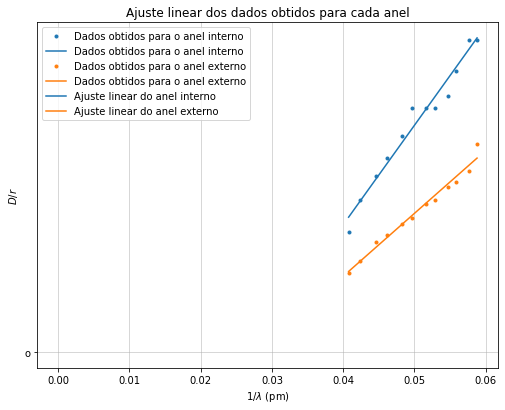

In [42]:
fig1 = plt.figure(figsize=(8,6))
axes = fig1.add_axes([0.1,0.1,0.8,0.8])

axes.plot(x, y1, ".", 'o', color="#1f77b4", label='Dados obtidos para o anel interno')
axes.plot(x, y2, ".", 'o', color="#ff7f0e", label='Dados obtidos para o anel externo')
axes.plot(x, mymodel1, "-", color="#1f77b4", label='Ajuste linear do anel interno')
axes.plot(x, mymodel2, "-", color="#ff7f0e", label='Ajuste linear do anel externo')
    
axes.set_xlabel('$1/λ$ (pm)')
axes.set_ylabel("$D/r$")

axes.set_title(f'Ajuste linear dos dados obtidos para cada anel')
    
plt.grid(linestyle='-', linewidth=0.5)
axes.legend(loc='upper left')
    
plt.savefig(f'ajusteLinear.png', dpi=400)